## Image thresholding - part2
In this notebook, we shall start working on the cassava root images and see how we can use thresholding as an approach to solving the PPD problem. The PPD problem can be broken into 2 sub-problems;
<ol>
    <li>Detecting the roots in the image</li>
    <li>Detecting the PPD within each root</li>
</ol>
Moving forward we may use combinations of techniques to reach an optimal solution for each of the problems. This will imply that you may need to read more extensively to get familiar with the implementations.

In [ ]:
# ! pip install imutils

In [1]:
# Import libraries
import os
import cv2
import glob # Read about glob, a python module used for retrieving paths matching a specified pattern
# import imutils
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Define the data directories
clean_images = glob.glob("images/ppd/clean-compressed/*.JPG")
damaged_images = glob.glob("images/ppd/degraded-compressed/*.JPG")

In [3]:
# for c in damaged_images:
#     img = cv2.imread(c)
#     img = imutils.resize(img, width=1280)
#     cv2.imwrite('images/ppd/degraded-compressed/'+os.path.basename(c) , img)

## Inspecting the data

View image samples

In [4]:
# Function to plot images
def plot_images(image_list, n_rows, n_cols, fig_size, gray=False):
    """Displays images using matplotlib's pyplot.

    Parameters:
    image_list (list) -- list of paths to images     
    n_rows (int) -- number of rows for display grid 
    n_cols (int) -- number of columns for display grid
    fig_size (tuple) -- size of figure to be displayed
    gray (Bool) -- specify if images ate to be read in grayscale
    """
    read_flag = 0 if gray else 1
    c_map = "gray" if gray else "viridis"
    plt.figure(figsize=fig_size)
    for i in range(len(image_list)):
        img = cv2.imread(image_list[i], read_flag)
        plt.subplot(n_rows,n_cols,i+1)
#         plt.xticks([]),plt.yticks([]) # Uncomment to remove axix labels
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap=c_map)        

In [5]:
# Show some of the clean samples in RGB
plot_images(random.sample(clean_images,3), 1, 3, (18,5))

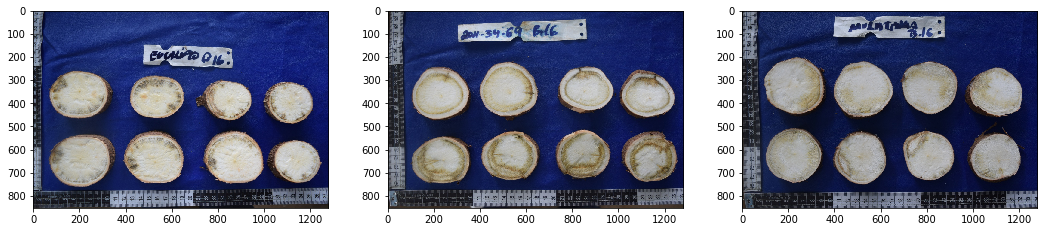

In [6]:
# Show some damaged samples in RGB
# Pass extra parameter True to display grayscale images.
plot_images(random.sample(damaged_images,3), 1, 3, (18,10))

## 1. Root Detection
Let's try to use thresholding to detect the roots in the images. We shall explore some of the methods that were used in the Image thresholding quickstart notebook and introducing some new techniques to try to accomplish this task.

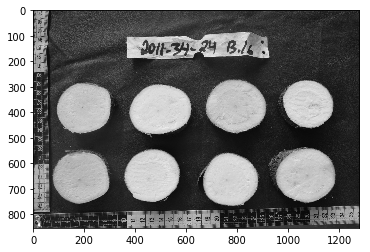

In [20]:
# Read images as grayscale.
# Here I use only a sample of the images, but you may use all of them
# Let us read and view a random clean image in grayscale
clean_img_gray = cv2.imread(random.choice(clean_images), 0)
plt.imshow(cv2.cvtColor(clean_img_gray,cv2.COLOR_BGR2RGB), cmap="gray")

In [26]:
# The grayscale image above should be able to separate the roots from most of the background by pixel value
# We can manually check some of the pixel values to make an approximation of the threshold value.
print("The pixel value at 100x200 is: ",clean_img_gray[100,200])
print("The pixel value at 200x400 is: ",clean_img_gray[200,400])
# These are some of the values from the darker regions of the images. Let us investigate for some of the lighter regions.
print("The pixel value at 400x200 is: ",clean_img_gray[400,200])
print("The pixel value at 400x500 is: ",clean_img_gray[400,500])

The pixel value at 100x200 is:  52
The pixel value at 200x400 is:  21
The pixel value at 400x200 is:  195
The pixel value at 400x500 is:  215


### Using the image histogram 

We can plot the pixel values on  histogram to make a more informed decision about the threshold. OpenCV calcHist takes the input image the number of channels, mask(if specified), histsize which is the number of bins
and the range for which we want to plot the histogram. Read the <a href="https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html">documentation here</a> to get details. 
Then we shall visualize this with matplotlib. This will give us a better representation of the posible pixel values that may be used as a threshold. it might be better to calculate the histogram over a sample of images and take the average which might be more representative but this is your homework. Also read about how to pass the mask attribute to analyze a specific area of the image.

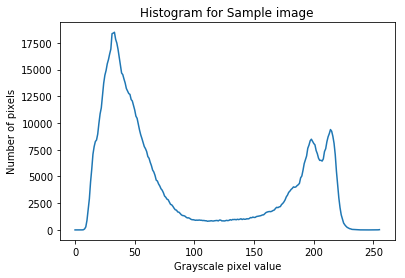

In [28]:
# You may also plot these in a normalized range like [0,1]
hist = cv2.calcHist([clean_img_gray],[0],None,[256],[0,256]) 

plt.figure()
plt.title("Histogram for Sample image")
plt.xlabel("Grayscale pixel value")
plt.ylabel("Number of pixels")
plt.plot(hist)
plt.show()

In [33]:
# From the plot above we can see that pixel values btween 110 and and 150 separate the 2 main parts of the image.
# So let's use 130 as a threshold and test with binary thresholding. 
# The shape of the histogram also hints about Otsu threshloding.
th_value = 130
ret,thresh_b = cv2.threshold(clean_img_gray,th_value,255,cv2.THRESH_BINARY)

plt.figure(figsize=(18,10))
plt.subplot(121),
plt.title("Original Grayscale Image")
plt.imshow(cv2.cvtColor(clean_img_gray,cv2.COLOR_BGR2RGB))
plt.subplot(122),
plt.title("Binary thresholding")
plt.imshow(cv2.cvtColor(thresh_b,cv2.COLOR_BGR2RGB))

Now let us try with Otsu thresholding

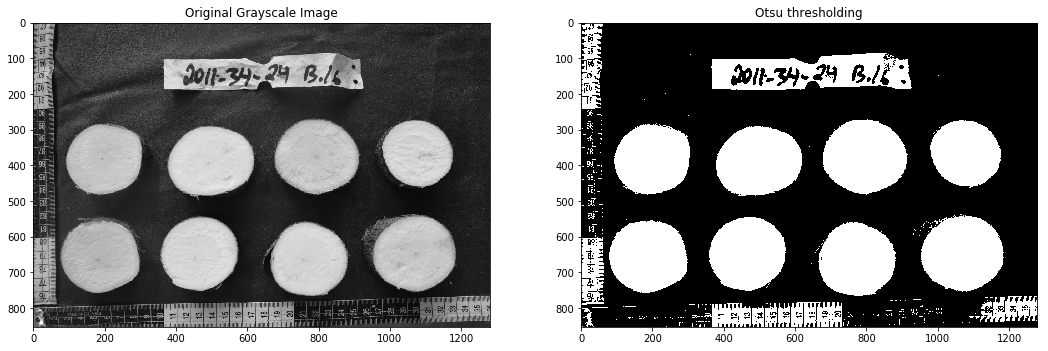

In [35]:
ret1,thresh_otsu = cv2.threshold(clean_img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(18,10))
plt.subplot(121),
plt.title("Original Grayscale Image")
plt.imshow(cv2.cvtColor(clean_img_gray,cv2.COLOR_BGR2RGB))
plt.subplot(122),
plt.title("Otsu thresholding")
plt.imshow(cv2.cvtColor(thresh_otsu,cv2.COLOR_BGR2RGB))

Both Binary and Otsu thresholding give good results in this case, although otsu thresholding gats more clarity around the characters on the label.

You can see from the output above that although we have managed to identify the roots, there are artifcts in the background that were also retained, especially the bright part of the images.
Your task is to investigate and suggest approaches for solving this problem. These will also come in handy with the damages roots where we have dark(damaged) areas within the bright(clean) areas of the root. <br>
The second part of this notebook will use the techiques you discover to try to eliminate the unwanted background and also apply these methods to the other category.

**Resources**
<ul>
    <li><a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding"></a>Image thresholding</li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
    <li><a href="#"></a></li>
</ul>